In [1]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import random

# 0. Leemos los datos

In [2]:
archivos_json = [archivo for archivo in os.listdir("data") if archivo.endswith('.json')]

In [3]:
paths = random.choices(archivos_json, k=10)

In [4]:
def read_json(path):
    with open(path) as f:
        data = json.load(f)
    return data

In [5]:
all_playlists = []
for p in paths:
    data = read_json(f"data\{p}")
    playlist = pd.DataFrame(data['playlists'])
    all_playlists.append(playlist)

In [6]:
playlists = pd.concat(all_playlists, ignore_index=True)

In [7]:
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Gopro,false,169000,1504137600,81,80,1,"[{'pos': 0, 'artist_name': 'Mani Hoffman', 'tr...",30,18715883,79,NaN
1,beats,false,169001,1497398400,37,24,1,"[{'pos': 0, 'artist_name': 'The Chainsmokers',...",7,7818875,12,NaN
2,My songs,false,169002,1446076800,16,13,2,"[{'pos': 0, 'artist_name': 'BTS', 'track_uri':...",3,3659428,7,NaN
3,High School Musical,false,169003,1328572800,9,3,2,"[{'pos': 0, 'artist_name': 'High School Musica...",2,1785140,3,NaN
4,Africa,false,169004,1508889600,35,30,1,"[{'pos': 0, 'artist_name': 'Wayne Wonder', 'tr...",8,9886390,25,NaN


In [9]:
expanded_tracks_df = pd.DataFrame()

# Iterar sobre cada fila y expandir los datos JSON en un dataframe
for index, row in playlists.iterrows():
    # Cargar el JSON desde la columna 'tracks'
    tracks = row['tracks']
    
    # Comprobar si 'tracks' es una cadena que necesita ser convertida de JSON
    if isinstance(tracks, str):
        try:
            tracks = json.loads(tracks)  # Cargar la cadena JSON
        except json.JSONDecodeError:
            tracks = []  # En caso de error, usar una lista vacía
    elif not isinstance(tracks, list):
        tracks = []  # Asegurar que tracks sea una lista si no es una cadena

    if tracks:
        track_data = json_normalize(tracks)
        track_data['pid'] = row['pid']  # añadimos el id de la playlist para mantener la referencia
        expanded_tracks_df = pd.concat([expanded_tracks_df, track_data], ignore_index=True)


In [10]:
playlists.drop("tracks", axis=1, inplace=True)
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,Gopro,false,169000,1504137600,81,80,1,30,18715883,79,NaN
1,beats,false,169001,1497398400,37,24,1,7,7818875,12,NaN
2,My songs,false,169002,1446076800,16,13,2,3,3659428,7,NaN
3,High School Musical,false,169003,1328572800,9,3,2,2,1785140,3,NaN
4,Africa,false,169004,1508889600,35,30,1,8,9886390,25,NaN


In [11]:
playlists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10000 non-null  object
 1   collaborative  10000 non-null  object
 2   pid            10000 non-null  int64 
 3   modified_at    10000 non-null  int64 
 4   num_tracks     10000 non-null  int64 
 5   num_albums     10000 non-null  int64 
 6   num_followers  10000 non-null  int64 
 7   num_edits      10000 non-null  int64 
 8   duration_ms    10000 non-null  int64 
 9   num_artists    10000 non-null  int64 
 10  description    149 non-null    object
dtypes: int64(8), object(3)
memory usage: 859.5+ KB


In [12]:
expanded_tracks_df.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Mani Hoffman,spotify:track:7nBkRT9hOe8d0ynEPGLi70,spotify:artist:4h5uH2PyDzfpfZresu96cw,Big Shots,spotify:album:7fWg5X9i7LQ70LBSPCPWIA,193988,Big Shots,169000
1,1,Rick Ross,spotify:track:39SQnz9u6zd91nZdaPmmJK,spotify:artist:1sBkRIssrMs1AbVkOJbc7a,Push It,spotify:album:42T8qfRs7jdpInsSk6nDJk,208600,Port Of Miami,169000
2,2,Frank Ocean,spotify:track:0725YWm6Z0TpZ6wrNk64Eb,spotify:artist:2h93pZq0e7k5yf4dywlkpM,Super Rich Kids,spotify:album:392p3shh2jkxUxY2VHvlH8,304760,channel ORANGE,169000
3,3,Flight Facilities,spotify:track:283LAlCpfArRZOXPfkOQj0,spotify:artist:1lc8mnyGrCLtPhCoWjRxjM,Crave You - Adventure Club Remix,spotify:album:3XaquASzv8n12oZLxej2YA,236930,Crave You (Remixes),169000
4,4,Ed Sheeran,spotify:track:10CThxBSCJs5TWsM0Fhdjv,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Bloodstream,spotify:album:5q9e0KBDIjiRBYWXxaWVAG,308876,We The Generation,169000


In [43]:
if (len(expanded_tracks_df["track_uri"].unique()) != len(expanded_tracks_df["track_name"].unique())):
    print("Existen canciones con el mismo nombre pero diferente URL")

Existen canciones con el mismo nombre pero diferente URL


Por lo anterior, usamos el URL para agrupar las canciones

In [13]:
expanded_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660122 entries, 0 to 660121
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pos          660122 non-null  int64 
 1   artist_name  660122 non-null  object
 2   track_uri    660122 non-null  object
 3   artist_uri   660122 non-null  object
 4   track_name   660122 non-null  object
 5   album_uri    660122 non-null  object
 6   duration_ms  660122 non-null  int64 
 7   album_name   660122 non-null  object
 8   pid          660122 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 45.3+ MB


# 1. Analisis Exploratorio

In [14]:
playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,Gopro,false,169000,1504137600,81,80,1,30,18715883,79,NaN
1,beats,false,169001,1497398400,37,24,1,7,7818875,12,NaN
2,My songs,false,169002,1446076800,16,13,2,3,3659428,7,NaN
3,High School Musical,false,169003,1328572800,9,3,2,2,1785140,3,NaN
4,Africa,false,169004,1508889600,35,30,1,8,9886390,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,That Playlist,false,677995,1481932800,58,43,1,36,13389322,39,NaN
9996,November,false,677996,1509321600,67,54,1,8,16061757,47,Image is Snapchat. The caption is &quot;Novemb...
9997,Pump Up,false,677997,1466467200,32,25,3,6,7466635,22,NaN
9998,London Philharmonic Orchestra – The 50 Greates...,false,677998,1381363200,50,2,1,2,15793971,4,NaN


In [15]:
expanded_tracks_df

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,pid
0,0,Mani Hoffman,spotify:track:7nBkRT9hOe8d0ynEPGLi70,spotify:artist:4h5uH2PyDzfpfZresu96cw,Big Shots,spotify:album:7fWg5X9i7LQ70LBSPCPWIA,193988,Big Shots,169000
1,1,Rick Ross,spotify:track:39SQnz9u6zd91nZdaPmmJK,spotify:artist:1sBkRIssrMs1AbVkOJbc7a,Push It,spotify:album:42T8qfRs7jdpInsSk6nDJk,208600,Port Of Miami,169000
2,2,Frank Ocean,spotify:track:0725YWm6Z0TpZ6wrNk64Eb,spotify:artist:2h93pZq0e7k5yf4dywlkpM,Super Rich Kids,spotify:album:392p3shh2jkxUxY2VHvlH8,304760,channel ORANGE,169000
3,3,Flight Facilities,spotify:track:283LAlCpfArRZOXPfkOQj0,spotify:artist:1lc8mnyGrCLtPhCoWjRxjM,Crave You - Adventure Club Remix,spotify:album:3XaquASzv8n12oZLxej2YA,236930,Crave You (Remixes),169000
4,4,Ed Sheeran,spotify:track:10CThxBSCJs5TWsM0Fhdjv,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Bloodstream,spotify:album:5q9e0KBDIjiRBYWXxaWVAG,308876,We The Generation,169000
...,...,...,...,...,...,...,...,...,...
660117,157,HAIM,spotify:track:02iCjWBd2cOMbTnMs5Zek8,spotify:artist:4Ui2kfOqGujY81UcPrb5KE,Don't Save Me,spotify:album:7CzrzGbCwqT8Y43tvIUPBX,231226,Days Are Gone,677999
660118,158,Justin Timberlake,spotify:track:6vt0I1cw1YmAIKDJvHVIM5,spotify:artist:31TPClRtHm23RisEBtV3X7,Suit & Tie,spotify:album:0O82niJ0NpcptYRxogeEZu,326280,The 20/20 Experience (Deluxe Version),677999
660119,159,Tycho,spotify:track:2qC1sUo8xxRRqYsaYEdDuZ,spotify:artist:5oOhM2DFWab8XhSdQiITry,Awake,spotify:album:7HWdGPosPkb9GY5MOgLgSW,283636,Awake,677999
660120,160,Guided By Voices,spotify:track:3vwST30FQzi06Ay3ZG3cMp,spotify:artist:4oV5EVJ0XFWsJKoOvdRPvl,Game of Pricks,spotify:album:0knOxGmTPc4Bd8gCeaqukQ,135160,Human Amusements at Hourly Rates - The Best of...,677999


In [27]:
by_playlist = expanded_tracks_df.groupby('pid').agg(
    num_songs=('track_name', 'count'),  # Contamos el número de canciones por playlist
    avg_duration=('duration_ms', 'mean'),  # Calculamos la duración media de las canciones
    artists=('artist_name', lambda x: set(x)),  # Obtenemos un conjunto de artistas únicos
    songs =('track_uri', lambda x: set(x)),  # Obtenemos un conjunto de caciones únicas
    albums =('album_name', lambda x: set(x))  # Obtenemos un conjunto de albumes únicos
)

by_playlist['avg_duration'] = by_playlist['avg_duration'] / 60000 # Convertimos la duración de milisegundos a minutos
by_playlist.head()

,num_songs,avg_duration,artists,songs,albums
pid,,,,,
13000,11,3.927188,"{Damian Marley, Kolohe Kai, Clifford Hayes And...","{spotify:track:2mKsPUojh602HvSeNt04CB, spotify...","{Live!, Finally - Single, Kaya, Welcome to Jam..."
13001,11,3.443586,"{Mc's Zaac & Jerry Smith, Fifth Harmony, Clean...","{spotify:track:7py16W5fWYLFFS6BElKAjn, spotify...","{Is This Love, Does Led Zeppelin II, Bumbum Gr..."
13002,19,3.836919,"{Bring Me The Horizon, All Time Low, Falling I...","{spotify:track:4bKE8zuzZg8e3fNdpK7QY9, spotify...","{With Ears To See And Eyes To Hear, Don't Pani..."
13003,133,3.961135,"{Calle 13, Shakira, Jennifer Lopez, Nelly Furt...","{spotify:track:0uqPG793dkDDN7sCUJJIVC, spotify...","{The Writing's On The Wall, Lip Gloss, RIOT!, ..."
13004,129,3.864509,"{Sublime With Rome, Bobby McFerrin, Red Hot Ch...","{spotify:track:2Z2vOukzwOgqR4dkymRSWd, spotify...","{Moonshine in the Trunk, Rock N Roll Jesus, Da..."


In [17]:
by_playlist.describe()   

,num_songs,avg_duration
count,10000.000000,10000.000000
mean,66.012200,3.916282
std,53.344991,0.708516
min,5.000000,1.514409
25%,26.000000,3.650468
50%,49.000000,3.831984
75%,92.000000,4.074993
max,250.000000,46.297635


In [18]:
by_playlist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 13000 to 960999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_songs     10000 non-null  int64  
 1   avg_duration  10000 non-null  float64
 2   artists       10000 non-null  object 
 3   songs         10000 non-null  object 
 4   albums        10000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 468.8+ KB


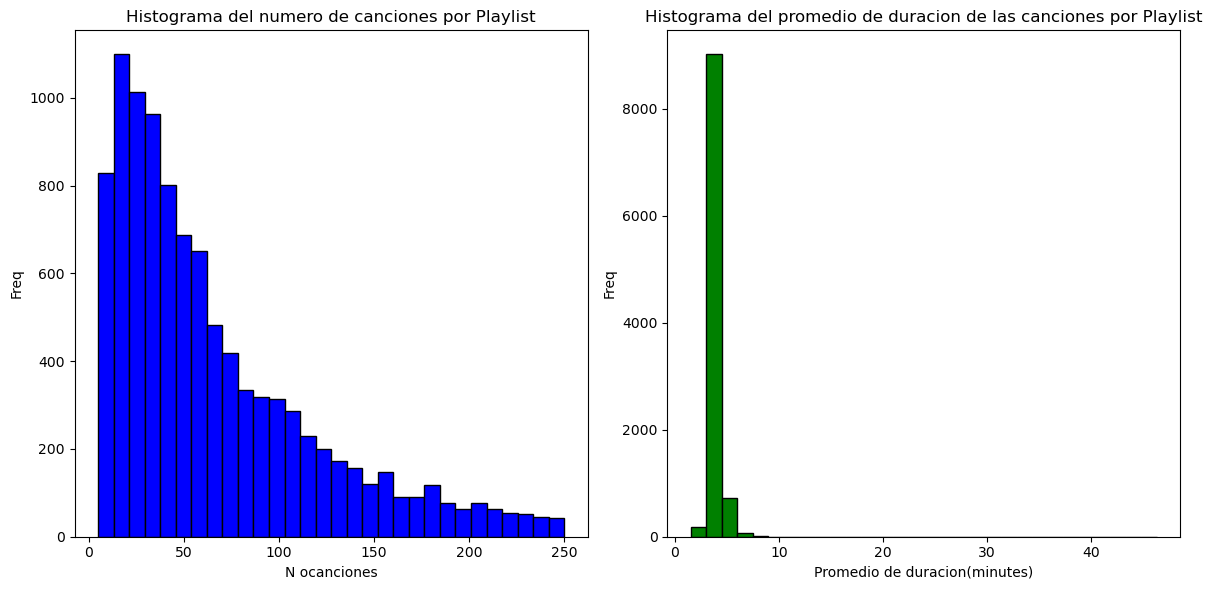

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Primer subplot para 'num_songs'
ax1.hist(by_playlist['num_songs'], bins=30, color='blue', edgecolor='black')
ax1.set_title('Histograma del numero de canciones por Playlist')
ax1.set_xlabel('N ocanciones')
ax1.set_ylabel('Freq')

# Segundo subplot para 'avg_duration'
ax2.hist(by_playlist['avg_duration'], bins=30, color='green', edgecolor='black')
ax2.set_title('Histograma del promedio de duracion de las canciones por Playlist')
ax2.set_xlabel('Promedio de duracion(minutes)')
ax2.set_ylabel('Freq')

# Ajustar el layout para evitar la superposición de elementos
plt.tight_layout()

# Mostrar la figura con ambos subplots
plt.show()

In [37]:
n_artists = len(expanded_tracks_df["artist_name"].unique())
n_albums = len(expanded_tracks_df["album_name"].unique())
n_songs = len(expanded_tracks_df["track_uri"].unique())

print(f"Número de artistas únicos: {n_artists}, Número de canciones únicas: {n_songs}, Número de albumes únicos: {n_albums}")

Número de artistas únicos: 35345, Número de canciones únicas: 168465, Número de albumes únicos: 68734


In [38]:
playlist_per_song = expanded_tracks_df.groupby('track_uri')['pid'].agg(list).reset_index()
playlist_per_song.head()

,track_uri,pid
0,spotify:track:000xQBsBOXGbHzbOwWsTua,[126146]
1,spotify:track:000xQL6tZNLJzIrtIgxqSl,"[169029, 169123, 169431, 169512, 169736, 13133..."
2,spotify:track:000xYdQfIZ4pDmBGzQalKU,[126935]
3,spotify:track:0010mZpCCwlPwoBiBsjoac,"[516148, 516548, 960282, 839759]"
4,spotify:track:001BVhvaZTf2icV88rU3DA,[677227]


In [39]:
playlist_per_song['n_playlists'] = playlist_per_song['pid'].apply(lambda x: len(set(x)))

In [40]:
playlist_per_song["n_playlists"].mean()

3.8694981153355297

In [41]:
playlist_per_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168465 entries, 0 to 168464
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_uri    168465 non-null  object
 1   pid          168465 non-null  object
 2   n_playlists  168465 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


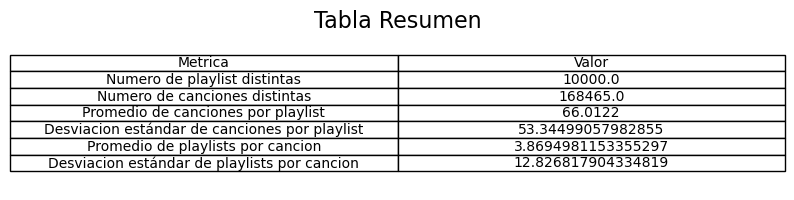

In [42]:
metricas = {
    'Metrica': ['Numero de playlist distintas', 'Numero de canciones distintas',
                'Promedio de canciones por playlist', 'Desviacion estándar de canciones por playlist',
                'Promedio de playlists por cancion', 'Desviacion estándar de playlists por cancion'],
    'Valor': [by_playlist.shape[0], n_songs, by_playlist["num_songs"].mean(), by_playlist["num_songs"].std(), 
              playlist_per_song["n_playlists"].mean(), playlist_per_song["n_playlists"].std()]
}

df = pd.DataFrame(metricas)

fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')
tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colWidths=[0.5, 0.5])
plt.title('Tabla Resumen', fontsize=16)
plt.show()

# 2. Baseline

In [26]:
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares
from implicit.bpr import BayesianPersonalizedRanking
from implicit.evaluation import mean_average_precision_at_k, ndcg_at_k

c:\Users\jasar\anaconda3\envs\Recomendadores\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_customers = LabelEncoder()
customer_id_encoded_train = label_encoder_customers.fit_transform(transactions_train['customer_id'])
customer_id_encoded_val = label_encoder_customers.fit_transform(transactions_val['customer_id'])

label_encoder_articles = LabelEncoder()
article_id_encoded_train = label_encoder_articles.fit_transform(transactions_train['article_id'])
article_id_encoded_val = label_encoder_articles.fit_transform(transactions_val['article_id'])

interacciones_train = csr_matrix((np.ones(transactions_train.shape[0]), (customer_id_encoded_train, article_id_encoded_train)))
interacciones_val = csr_matrix((np.ones(transactions_val.shape[0]), (customer_id_encoded_val, article_id_encoded_val)))


def evaluar_als(dimension):
    modelo = AlternatingLeastSquares(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk

def evaluar_bpr(dimension):
    modelo = BayesianPersonalizedRanking(factors=dimension)
    modelo.fit(interacciones_train)
    mapk = mean_average_precision_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    ndcgk = ndcg_at_k(modelo, train_user_items=interacciones_train, test_user_items=interacciones_val, K=10)
    return mapk, ndcgk
